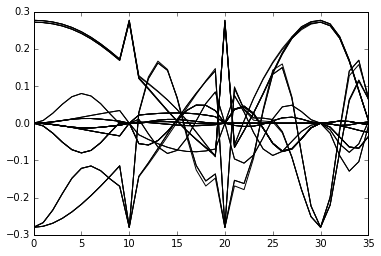

In [67]:
# Convert a file with the Interstial Force Constants from a text file into an array. This will allow the numerical values
# to be analyzed. 

%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot


f=open("si.666.fc")     # open the file
Data = f.readlines()    # Read the file
Data = Data[17::]       # Discard the beginning of the file, which constains information on the lattice. It is not needed


# This does several things:
#   - it removes all the 'new line' characters with split
#   - it splits the individual numbers elements separated by a space into different list elements
for n in range(len(Data)):
    Data[n] = Data[n].strip().split()

# -------
# Separate and filter the list elements into an array 
# -------

# Creare the array where the elements will be stored
IFC = np.zeros((len(Data),4))

# assign elements of the list into an array
for n in range(len(Data)):
    Data_temp = Data[n]
    for i in range(4):
        IFC[n,i] = Data_temp[i]

#print IFC

# Create a matrix that walks along the high symmetry lines. Gamma -> X -> K -> Gamma -> L. See the FCC 1st Brillouin zone
#i.e. a BCC weignerseitz cell

walk = np.zeros(shape=(36,3))

for i in range(0,10):
    walk[i,0] = i/10.

for i in range(11,20):
    walk[i,0] = 1.
    walk[i,1] = (i-10.)/10.

for i in range(21,30):
    walk[i,0] = (30.-i)/10.
    walk[i,1] = (30.-i)/10.
    
for i in range(31,36):
    walk[i,0] = (i-30.)/10.
    walk[i,1] = (i-30.)/10.
    walk[i,2] = (i-30.)/10.

# -------    
# Calculate the Fourier Transform along the high symmetry lines
# -------
C_q = np.zeros(shape=(36,36))

# The i is for different spatial and atomic positions. The k is for different q values. The l is along all the R values.
for i in range(36):
    for k in range(36):
        for l in range(216):
            # Complete the q and R dot product prior to the the fourier transform
            q_R = IFC[l+i*217+1,0]*walk[k,0]+IFC[l+i*217+1,1]*walk[k,1]+IFC[l+i*217+1,2]*walk[k,2]
            
            C_q[k,i] += IFC[l+i*217+1,3]*(math.cos(q_R))
            
            #C_q[k,i] += IFC[l+i*217+1,3]*(math.cos(q_R)-math.sin(q_R)*1j)     # Complete the Fourier Transform
    
# Plot the bands
q = np.linspace(0.,35, 36)

for i in range(36):
    pyplot.plot(q, C_q[:,i], color='black')
    
    

In [41]:
g = open("si.freq.mein.txt","w")



#g.write(str(C_q))
g.write(C_q)


In [43]:
np.savetxt('si.freq.mein.txt', C_q, delimiter=' ,')

In [55]:
q = np.linspace(0.,35, 36)


x = range(36)

print q
print C_q[:,0]

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.]
[ 0.27161008  0.27054052  0.26723695  0.26145467  0.25290452  0.2413854
  0.22689526  0.20967952  0.19019768  0.16901823  0.27161008  0.12035833
  0.09180268  0.06230647  0.03323479  0.00568446 -0.01977292 -0.04318369
 -0.065111   -0.08637402  0.27161008 -0.0643973  -0.02004319  0.0271302
  0.07872645  0.13341754  0.18554955  0.22753314  0.2546824   0.26795693
  0.27161008  0.26205579  0.22841257  0.16651552  0.086819    0.00734598]


In [57]:
pyplot.plot(q, C_q[:,0])